# Read Data

In [1]:
import pandas as pd
import numpy as np

T2 = pd.read_csv('StataReg/CountyVaccineApril07.csv')
print(T2.shape)

T2

(1296, 127)


,State,County,AreaName,FIPS,Vax_White,Vax_Black,VaxNumb_White,VaxNumb_Black,Total_Whole,Total_White,...,HighSchool_Disparity,Bachelor_Disparity,IT_Disparity,CnoI_Disparity,noC_Disparity,Above75_Disparity,Unemployment_Disparity,MeanIncome_Disparity,MedianIncome_Disparity,FluVax_Disparity
0,California,Alameda,"Alameda, California",6001,0.226151,0.229917,186256.131102,42389.339979,1671329,823593,...,0.015,0.232,0.096,-0.053,-0.044,0.004083,-0.048,24218.0,56757.0,0.24
1,California,Amador,"Amador, California",6005,0.288921,0.062503,10295.982504,66.627963,39752,35636,...,0.263,0.182,0.344,0.057,-0.408,0.102773,0.070,32510.0,NaN,0.10
2,California,Butte,"Butte, California",6007,0.206429,0.122307,38755.387296,508.553106,219186,187742,...,-0.009,0.068,0.064,-0.087,0.021,0.042232,-0.123,13412.0,23524.0,0.13
3,California,Calaveras,"Calaveras, California",6009,0.196043,0.122764,8185.189474,61.136490,45905,41752,...,0.238,0.065,-0.138,0.061,0.065,0.037466,-0.396,15259.0,NaN,0.08
4,California,Colusa,"Colusa, California",6011,0.090019,0.103684,1767.066692,29.238932,21547,19630,...,-0.030,0.064,-0.012,-0.036,0.045,-0.006429,-0.036,11741.0,40316.0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,Oregon,Columbia,"Columbia, Oregon",41009,0.176118,0.178392,8522.000000,71.000000,52354,48388,...,0.058,-0.234,0.320,-0.117,-0.209,0.046686,0.061,-784.0,NaN,-0.03
1292,Oregon,Clatsop,"Clatsop, Oregon",41007,0.169545,0.126074,6313.000000,44.000000,40224,37235,...,0.135,0.043,-0.125,0.057,0.063,0.023226,0.054,17589.0,33816.0,0.00
1293,Oregon,Clackamas,"Clackamas, Oregon",41005,0.188496,0.188551,70058.000000,942.000000,418187,371668,...,0.070,0.038,-0.017,0.000,0.014,0.051592,-0.049,10253.0,42201.0,0.18
1294,Oregon,Benton,"Benton, Oregon",41003,0.274066,0.207199,22067.000000,236.000000,93053,80517,...,-0.022,-0.023,0.056,-0.010,-0.047,0.050318,-0.055,17056.0,NaN,0.23


# Preprocessing

In [2]:
# first processing
T2 = T2[-T2['Vax_Disparity'].isna()]
print(T2.shape)

(1193, 127)


In [3]:
T2 = T2[-T2['FluVax_Disparity'].isna()]
print(T2.shape)

(969, 127)


In [4]:
T2 = T2[-T2['Above75_Disparity'].isna()]
print(T2.shape)

(969, 127)


In [5]:
T2['FacNum'] = T2[['FQHC', 'HOPD', 'PHMCY', 'RUHC',] ].sum(axis = 1)
T2['vehicle'] = 1- T2['EP_NOVEH']

T2['Vax_DisparityY'] = T2['Vax_Disparity']*100
T2['FluVax_DisparityY'] = T2['FluVax_Disparity']*100


T2['logFacNum' ] = np.log(T2['FacNum' ] + 1)
T2['logcases' ] = np.log(T2['cases' ] + 1)

T2['CaseRate' ] = T2['cases' ]/T2['Total_Whole']
T2['FacNumRate' ] = T2['FacNum' ]/T2['Total_Whole']

print(T2.shape)

(969, 135)


# Make Directory

In [6]:
from datetime import datetime
import os

folder = str(datetime.now()).split('.')[0].replace(':', '-').replace(' ', '_')
Result = 'StataReg/RegResult'
path = os.path.join(Result, folder)
print('Generate Path:', path)
os.makedirs(path)

Generate Path: StataReg/RegResult/2021-04-18_11-19-17


# Preprocess Data

In [7]:


def get_stata(T2, cols, path):
    T2['log_Total_Whole'] = np.log(T2['Total_Whole'])
    T2['org_Total_Whole'] = T2['Total_Whole'] + 0
    T2['BlackWhiteRatio'] = T2['Total_Black']/T2['Total_White']
    
    prefix_cols  = ['State', 'County']
    addtion_cols = ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole']
    addtion_cols = addtion_cols if 'IT_Disparity' in cols else addtion_cols + ['IT_Disparity']
    
    print('prefix cols:', prefix_cols)
    print('addition cols:', addtion_cols)
    
    
    # Step1: Slicing
    newT = T2[prefix_cols + cols + addtion_cols]

    # Step2: drop nan
    
    print('From:', newT.shape)#.head()
    newT2 = newT.dropna()
    print('Dropping Nan in Independent Variables')
    print('To  :', newT2.shape)
    # newT2
    
    # Step3: Dropping
    # return newT2
    # newT2 = newT2[newT2['org_Total_Whole'] >= 20000];print(newT2.shape)
    # newT2 = newT2[newT2['Total_Black'] >= 400];print(newT2.shape)
    newT2 = newT2[newT2['Total_Black'] >= 273];print(newT2.shape)
    # newT2 = newT2[newT2['BlackWhiteRatio'] >= 0.01];print(newT2.shape)
    # newT2 = newT2[newT2['CI_Disparity'] >= -0.05]; print(newT2.shape)
    
    
    print('Dropping Small Black Population')
    print('To  :', newT2.shape)
    path2Dict = os.path.join(path, 'DataVarDict.csv')
    path2Stata = os.path.join(path, 'Data.dta')
    newT2.describe().T.to_csv(path2Dict)
    newT2.to_stata(path2Stata)
    print(path2Dict)
    print(path2Stata)
    
    
    # Step4: Normalizing, only cols
    Y = cols[0]
    if "Y" in Y:
        not_normalized_cols = ['Vax_DisparityY','Flu_DisparityY', 'republican', 'urban']
    else:
        not_normalized_cols = ['republican', 'urban']
    
    newT3 = newT2.copy()
    for i in cols:
        if i in not_normalized_cols:continue
        df = newT3[i]
        newT3[i]=(df-df.mean())/df.std()
        
    
    path3Dict = os.path.join(path, 'DataVarDictNorm.csv')
    newT3.describe().T.to_csv(path3Dict )
    print(path3Dict)

            
    # Step5: Save Stata
    path3Data = os.path.join(path, 'DataNorm.dta')
    newT3.to_stata(path3Data)
    print(path3Data)
    
    return newT2, newT3


cols = ['Vax_Disparity', 'HighSchool_Disparity', 'HighSchool_Rate']
newT2, newT3 = get_stata(T2, cols, path)
# newT2 = newT2[newT2['CI_Disparity'] >= -0.05]

prefix cols: ['State', 'County']
addition cols: ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole', 'IT_Disparity']
From: (969, 10)
Dropping Nan in Independent Variables
To  : (967, 10)
(882, 10)
Dropping Small Black Population
To  : (882, 10)
StataReg/RegResult/2021-04-18_11-19-17/DataVarDict.csv
StataReg/RegResult/2021-04-18_11-19-17/Data.dta
StataReg/RegResult/2021-04-18_11-19-17/DataVarDictNorm.csv
StataReg/RegResult/2021-04-18_11-19-17/DataNorm.dta


# Stata Code

## Get Regression Code

In [8]:
def get_regression(Y, X, CV, addText, state_dummy_num = '16'):
    # Y: string
    # X: list
    # CV: dict(string: list)
    
    reg_string = ' '.join(['reg', Y] + X + sum([v for k, v in CV.items()], []))
    # reg_string = reg_string+'dummy
   
    
    reg_string = reg_string + ' state_dummy1-state_dummy{} '.format(state_dummy_num)
    if addText.get('W'):
        reg_string = reg_string + ' [pweight=org_Total_Whole] '  ### 
    if addText.get('R'):
        reg_string = reg_string + ', r ' if ',' not in reg_string else reg_string + 'cluster(State) ' 
    if addText.get('C'):
        reg_string = reg_string + ', cluster(State) ' if ',' not in reg_string else reg_string + 'cluster(State)'
    return reg_string


# addText = {
#     'R': True,
#     'C': True,
#     'W': True
# }


# code = get_regression(Y, X, CV, addText, use_Age75 = False)
# print(code)    

## Get Outreg2 Code

In [9]:
def get_outreg2(Y, X, DocName, addText, replace = False):
    # Title = '_'.join(['Mdl', '.'.join([k for k, v in addText.items() if v] )])
    # Title = Title[:-1] if Title[-1] == '_' else Title
    # omit = "state_dummy1-state_dummy" + max_state + " o.state_dummy1-o.state_dummy" + max_state
    Title = Y
    TitleString = 'append ctitle({})'.format(Title) if not replace else 'replace ctitle({})'.format(Title)
    addTextString = 'addtext(SD, True, ' + ', '.join([k + ', ' + str(v) for k, v in addText.items()]) + ')' 
    d = ' '.join(['outreg2 using', 
                  DocName + ',', 
                  TitleString,  
                  addTextString, 
                  " keep (" +' '.join(X) + ') '
                  'excel'])
    return d
    
    
    
# DocName = 'Test.xlsx'
# Title = 'First'
# addText = {
#     'R': True,
#     'C': True,
#     'W': True
# }
# replace = True

# get_outreg2(Y, X, DocName, addText, replace, )

In [10]:
DataPath = os.path.join(os.getcwd(), path, 'Data.dta')
DataPath

'/Users/floydluo/Desktop/Covid19-Vaccination-Race-Disparity/StataReg/RegResult/2021-04-18_11-19-17/Data.dta'

 # Set Regression Variables

In [11]:
Y  = 'Vax_DisparityY' 
Y2 = 'FluVax_DisparityY' 
X_list = [
# Base Model
[
'MedianIncome', 
'MedianIncome_Disparity',

'HighSchool_Rate',
'HighSchool_Disparity',

'logFacNum',
'logcases', 

'IT_Rate',
'IT_Disparity',

'urban',

'vehicle',

'republican',

'Segregation',

'racial_weighted_bias',

'hesitancy'],

# Robustness Check 
[
'FluVax_Rate',
'FluVax_Disparity'
],

[
'Above75_Rate',
'Above75_Disparity'
],
]

all_variables = [Y, Y2] + sum(X_list, [])
print(all_variables)
newT2, newT3 = get_stata(T2, all_variables, path)

['Vax_DisparityY', 'FluVax_DisparityY', 'MedianIncome', 'MedianIncome_Disparity', 'HighSchool_Rate', 'HighSchool_Disparity', 'logFacNum', 'logcases', 'IT_Rate', 'IT_Disparity', 'urban', 'vehicle', 'republican', 'Segregation', 'racial_weighted_bias', 'hesitancy', 'FluVax_Rate', 'FluVax_Disparity', 'Above75_Rate', 'Above75_Disparity']
prefix cols: ['State', 'County']
addition cols: ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole']
From: (969, 26)
Dropping Nan in Independent Variables
To  : (779, 26)
(759, 26)
Dropping Small Black Population
To  : (759, 26)
StataReg/RegResult/2021-04-18_11-19-17/DataVarDict.csv
StataReg/RegResult/2021-04-18_11-19-17/Data.dta
StataReg/RegResult/2021-04-18_11-19-17/DataVarDictNorm.csv
StataReg/RegResult/2021-04-18_11-19-17/DataNorm.dta


In [12]:

state_dummy_num = 16 
DocName = os.path.join(path, 'RegResult.doc')
DataPath = os.path.join(os.getcwd(), path, 'DataNorm.dta')


L = [
    # 'ssc install grstyle', 
    # 'ssc install coefplot', 
    # 'ssc install palettes',
    # 'ssc install colrspace',
    'clear all',
    'set more off',
    'use "' + DataPath + '"',
    '\n', 
    # "preserve\n", 
    "tab State, generate(state_dummy)",
    '\n',  
]

# 
# L = L  + ['winsor2 {}, replace cuts(1 99)'.format(i) for i in all_variables] + ['\n\n']
# L = L  + ['winsor2 {}, replace cuts(2 98)'.format(i) for i in all_variables] + ['\n\n']
L = L  + ['winsor2 {}, replace cuts(5 95)'.format(i) for i in all_variables] + ['\n\n']
# L = L  + ['winsor2 {}, replace cuts(10 90)'.format(i) for i in all_variables] + ['\n\n']


addText = {
    'R': True,
    'C': True,
    'W': True,
}
CV = {}


Title = 'FVAD' if 'flu' in Y.lower() else 'CVAD'

Regression_Commands = []


for idx, X in enumerate(X_list):
    X_used = sum(X_list[:idx+ 1], [])
    reg_string = get_regression(Y, X_used, CV, addText, state_dummy_num)
    
    Regression_Commands.append(reg_string) 
    
    
    replace = True if idx == 0 else False
    out = get_outreg2(Title, X_used, DocName, addText, replace)

    L = L +[reg_string+'\n', out, '\n']
    if X_used[-1] == 'hesitancy':
        reg_string = get_regression(Y2, X_used, CV, addText, state_dummy_num)
        replace = True if idx == 0 else False
        out = get_outreg2('FVAD', X_used, DocName, addText, False)
        L = L +[reg_string+'\n', out, '\n']
        
        Regression_Commands.append(reg_string) 




visualization = [Regression_Commands[0], 'estimates store covid', 
                 Regression_Commands[1], 'estimates store flu', 
                 'grstyle init',
                 'grstyle set plain, horizontal grid',
                 'grstyle set color Accent: p#bar p#barline', 
                 # 'coefplot covid, bylabel(COVID19 Vaccination Disparity) || flu, bylabel(Flu Vaccination Disparity) ||, '
                 # 'keep(MedianIncome MedianIncome_Diff HighSchool_Whole HighSchool_Diff logFacNum logcases CI_Whole CI_Diff urban vehicle republican Segregation racial_weighted_bias hesitancy ) '
                 # 'xline(0) recast(bar) ciopts(recast(rcap)) citop barwidt(0.3) bgcolor(white) levels(95) '
                 # 'rename(MedianIncome="Median Income" MedianIncome_Diff = "Median Income Disparity" HighSchool_Whole="High School Graduation Rate" HighSchool_Diff="High School Disparity"  logFacNum="No. of Health Facilities" logcases="No. of COVID-19 Cases" CI_Whole="Home IT Rate"  CI_Diff="Home IT Disparity" urban="Urban" vehicle="Rate of Vehicle Ownership" republican="Political Ideology" Segregation="Segregation Index" racial_weighted_bias="Racial Bias" hesitancy="Vaccine Hesitancy") '
                 # 'note("The x-axis is percentage point.")'
                ]



L = L + visualization

stata_string =  '\n'.join(L)
StataCodePath = os.path.join(os.getcwd(), path, 'do_file.do')
print(StataCodePath, '\n\n\n')
print(stata_string)
with open(StataCodePath, 'w') as f:
    f.write(stata_string)


/Users/floydluo/Desktop/Covid19-Vaccination-Race-Disparity/StataReg/RegResult/2021-04-18_11-19-17/do_file.do 



clear all
set more off
use "/Users/floydluo/Desktop/Covid19-Vaccination-Race-Disparity/StataReg/RegResult/2021-04-18_11-19-17/DataNorm.dta"


tab State, generate(state_dummy)


winsor2 Vax_DisparityY, replace cuts(5 95)
winsor2 FluVax_DisparityY, replace cuts(5 95)
winsor2 MedianIncome, replace cuts(5 95)
winsor2 MedianIncome_Disparity, replace cuts(5 95)
winsor2 HighSchool_Rate, replace cuts(5 95)
winsor2 HighSchool_Disparity, replace cuts(5 95)
winsor2 logFacNum, replace cuts(5 95)
winsor2 logcases, replace cuts(5 95)
winsor2 IT_Rate, replace cuts(5 95)
winsor2 IT_Disparity, replace cuts(5 95)
winsor2 urban, replace cuts(5 95)
winsor2 vehicle, replace cuts(5 95)
winsor2 republican, replace cuts(5 95)
winsor2 Segregation, replace cuts(5 95)
winsor2 racial_weighted_bias, replace cuts(5 95)
winsor2 hesitancy, replace cuts(5 95)
winsor2 FluVax_Rate, replace cuts(5 95)
winsor2 

# Run Regression

In [13]:
# import subprocess

# ## Do some processing in Python

# ## Set do-file information
# dofile = StataCodePath

# stata_app_path = '/Applications/Stata/StataSE.app/Contents/MacOS/StataSE'
# cmd = [stata_app_path, "do", dofile, "mpg", "weight", "foreign"]

# ## Run do-file
# subprocess.call(cmd) 

# Visualization

## All Counties


### Histogram

In [14]:
import pandas as pd
# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate

# print(T2.shape)

RawData = pd.read_csv('StataReg/CountyVaccineApril07.csv')

print(RawData.shape)


L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'Black'
    dn['Rate (%)'] = d['Vax_Black'] * 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'White'
    dn['Rate (%)'] = d['Vax_White']* 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'Black'
    dn['Rate (%)'] = d['FluVax_Black']* 100
    L.append(dn)
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'White'
    dn['Rate (%)'] = d['FluVax_White']* 100
    L.append(dn)
    
newdf = pd.DataFrame(L)

# newdf
    


(1296, 127)


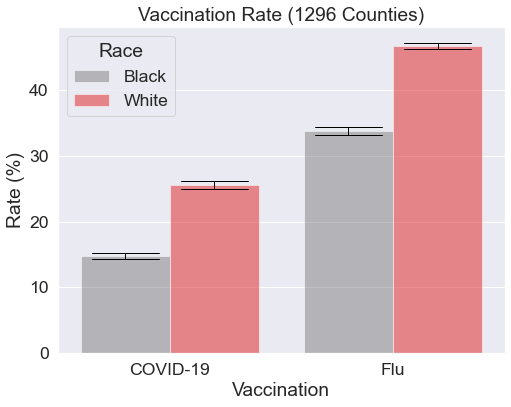

In [15]:

import seaborn as sns
sns.set_theme(style="whitegrid")

val = 1.6

sns.set(font_scale=val)



from matplotlib import pyplot
import seaborn

# import mylib

dims = (8, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)


# df.to_csv('759_rate.csv')
ax = sns.barplot(x="Vaccination" , y="Rate (%)", hue="Race", palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf,errwidth = 1, errcolor = 'black', capsize=.3).set_title('Vaccination Rate (1296 Counties)')
# ax.s

In [16]:
Rate = RawData[['Vax_Disparity', 'Vax_Black', 'Vax_White',  'FluVax_Disparity', 'FluVax_Black', 'FluVax_White',]].mean()*100
Rate

Vax_Disparity       10.892987
Vax_Black           14.761697
Vax_White           25.555354
FluVax_Disparity    14.601162
FluVax_Black        33.757986
FluVax_White        46.658687
dtype: float64

### Distribution

/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

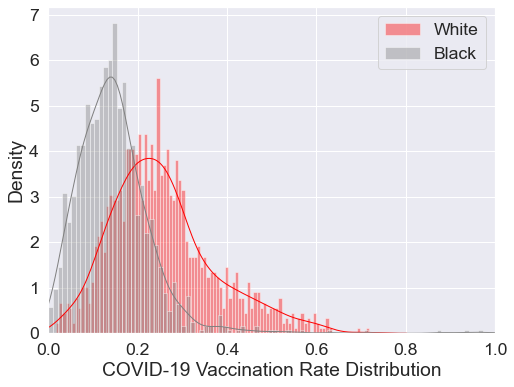

In [17]:
dims = (8, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)



ax = sns.distplot(RawData['Vax_White'], hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')
ax = sns.distplot(RawData['Vax_Black'], hist=True, kde=True,
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')
pyplot.legend(loc='best')





ax.set(xlabel='COVID-19 Vaccination Rate Distribution')
ax.set(xlim=(0, 1))


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

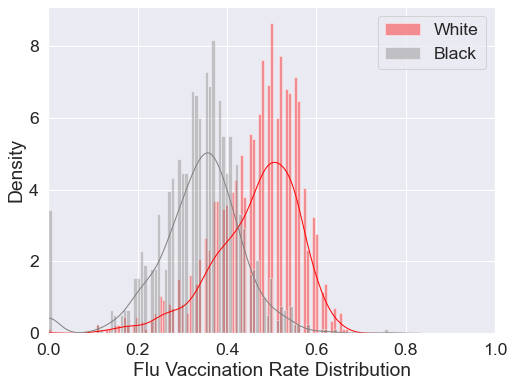

In [18]:
dims = (8, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)



# sns.set_style("whitegrid")
ax = sns.distplot(RawData['FluVax_White'], hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')
ax = sns.distplot(RawData['FluVax_Black'], hist=True, kde=True,
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')
pyplot.legend(loc='best')
ax.set(xlabel='Flu Vaccination Rate Distribution')
ax.set(xlim=(0, 1))


## 759 Counties




### Scatter Matrix

In [19]:
import seaborn as sns
sns.set_theme(style="ticks")

cols = ['Vax_DisparityY', 'FluVax_DisparityY', 'MedianIncome_Disparity',  'HighSchool_Disparity', 
         'logcases', 'logFacNum', 'IT_Rate',
        'republican','Segregation',  'vehicle',   ]

print(cols)

df = newT2[cols]

new_cols = ['CVD (%)', 'FVD (%)', 'Income Disparity',  'High School Disparity',
          'Covid Cases', 'Health Facility Num',  'Home IT Rate', 
         'Political Ideology', 'Segregation', 'Vehicle Rate', ]
df.columns = new_cols
df

['Vax_DisparityY', 'FluVax_DisparityY', 'MedianIncome_Disparity', 'HighSchool_Disparity', 'logcases', 'logFacNum', 'IT_Rate', 'republican', 'Segregation', 'vehicle']


,CVD (%),FVD (%),Income Disparity,High School Disparity,Covid Cases,Health Facility Num,Home IT Rate,Political Ideology,Segregation,Vehicle Rate
0,-0.376632,24.0,56757.0,0.015,11.339667,5.669881,0.914,0,49.890444,0.904
2,8.412182,13.0,23524.0,-0.009,9.341105,3.688879,0.891,0,62.099507,0.928
4,-1.366548,13.0,40316.0,-0.030,7.684324,1.609438,0.865,0,19.219010,0.946
5,2.264612,27.0,39955.0,0.007,11.095636,5.093750,0.938,0,52.702580,0.945
6,14.325305,37.0,-57188.0,0.153,7.117206,2.197225,0.840,0,35.769303,0.904
...,...,...,...,...,...,...,...,...,...,...
1278,4.665864,15.0,-2179.0,-0.089,8.045268,2.639057,0.843,0,66.592203,0.933
1281,6.230921,17.0,21917.0,0.017,9.154722,4.290459,0.881,0,66.901068,0.934
1286,8.069566,11.0,638.0,-0.060,7.991592,3.496508,0.857,0,65.099844,0.933
1292,4.347028,0.0,33816.0,0.135,6.751101,2.564949,0.875,0,55.186921,0.923


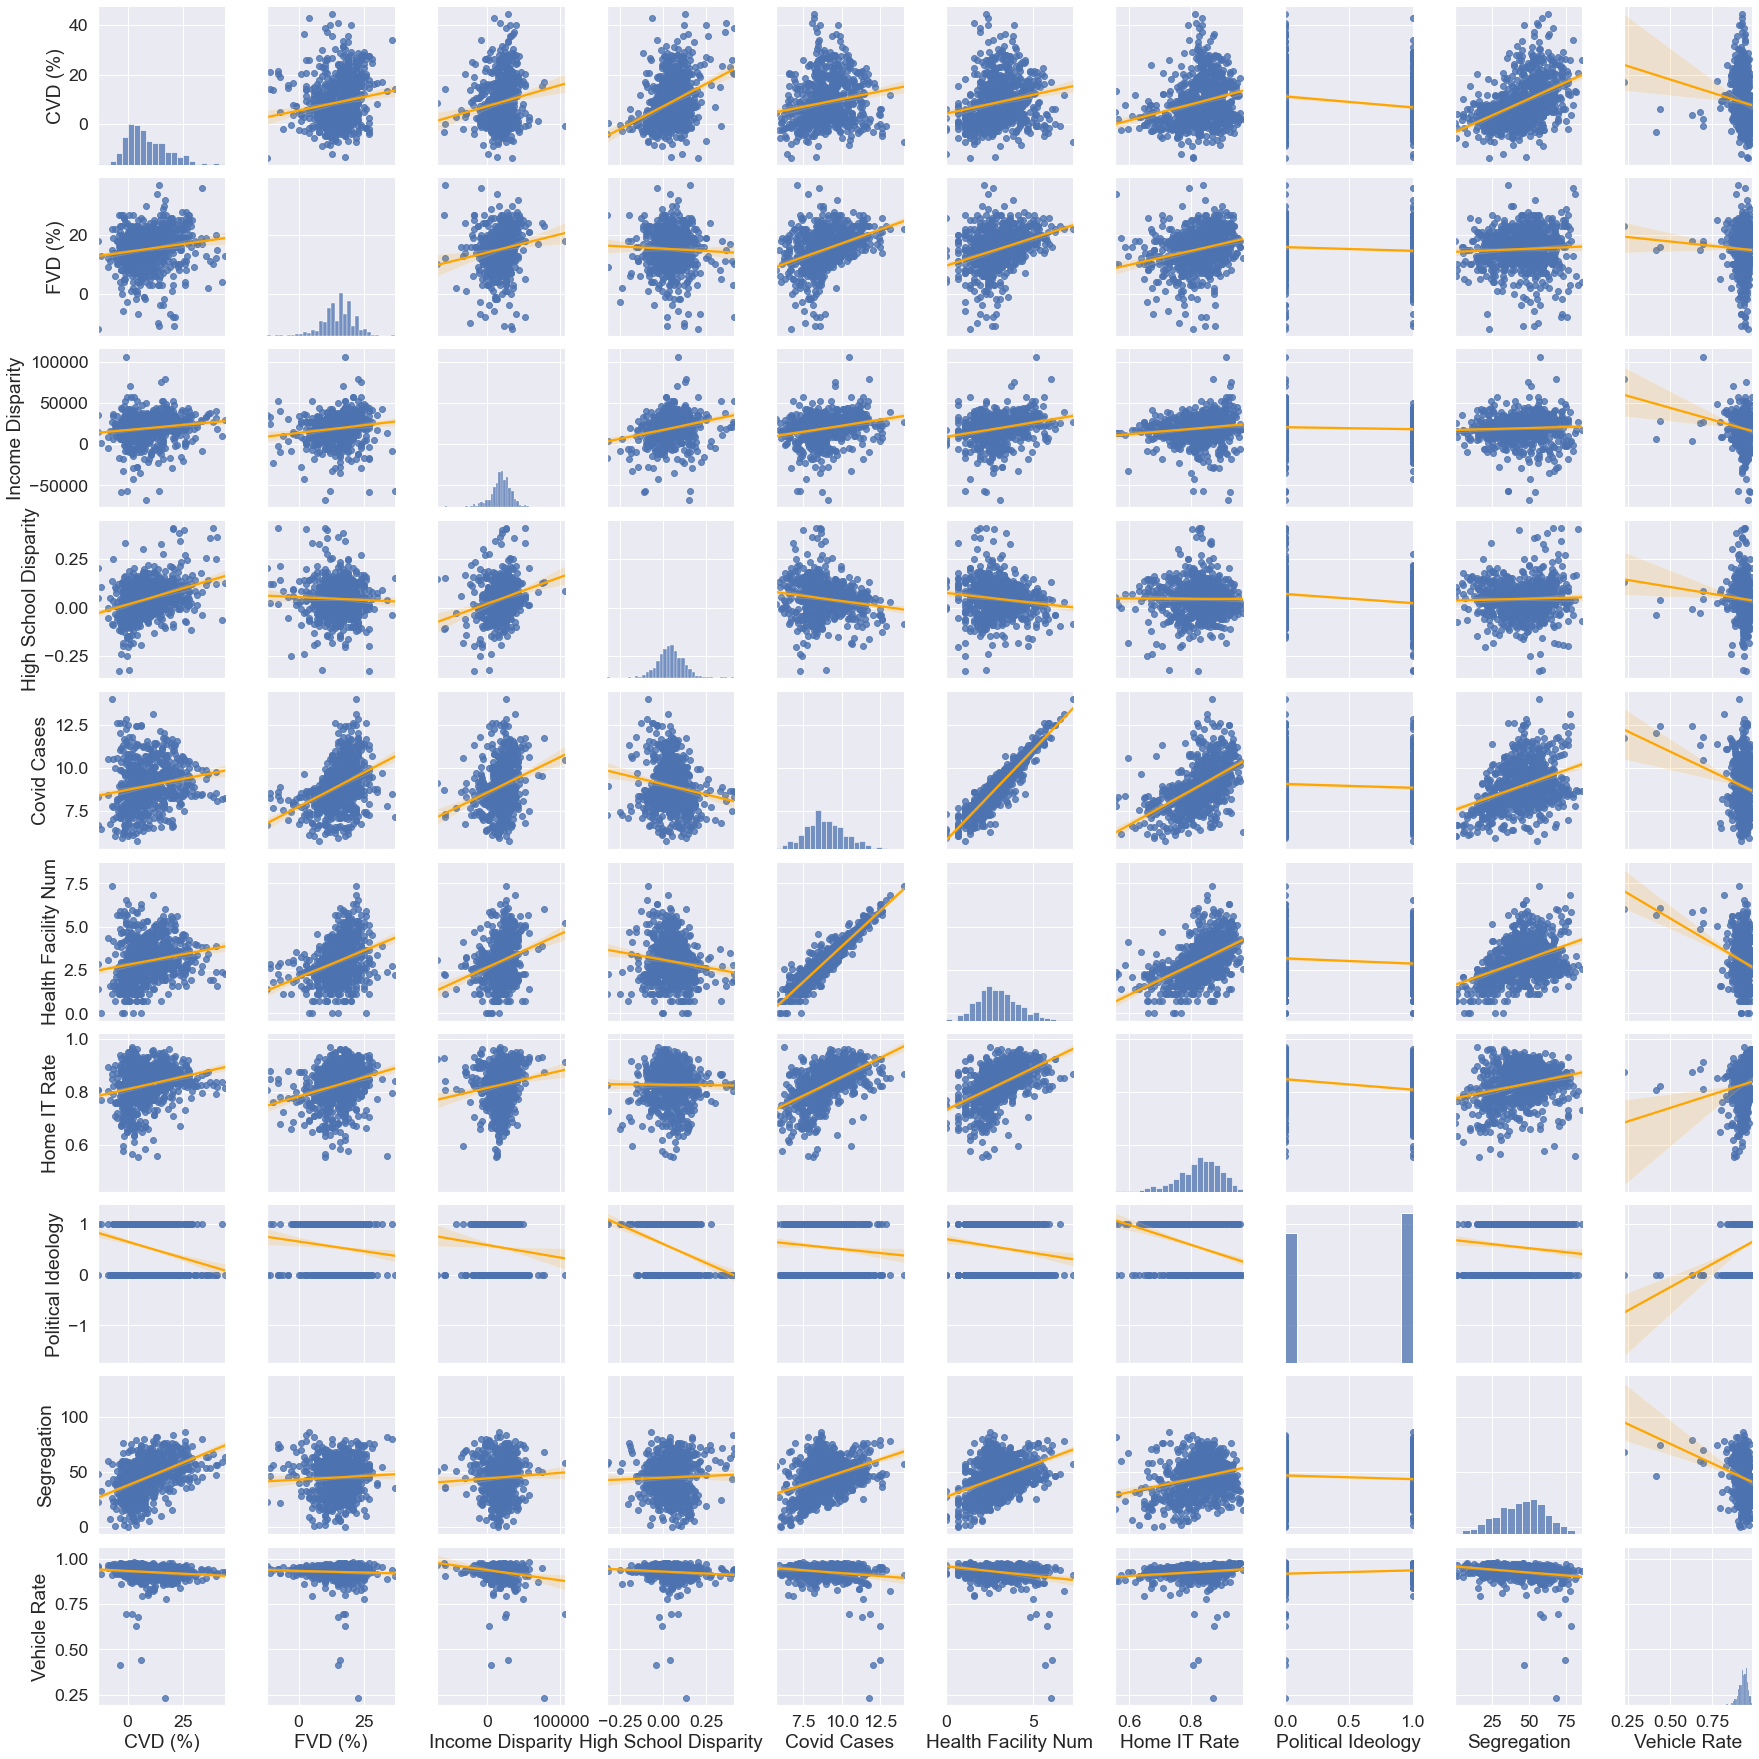

In [20]:
# winsorize 95
val = 1.6

sns.set(font_scale=val)

sns.pairplot(df, 
             kind = 'reg', 
             plot_kws= {
                 'line_kws':{'color':'orange'},
             })